## Overview

1. Optimal Substructure Property: When a problem has a recursive substructure. Eg: Fibonacci

2. Overlapping Subtree Property: When subtrees of a recursive tree has many 'repeated' subtrees
![](../images/overlap.png)

For such recursive problems the time complexity tends to be exponential O(2^n). The solution to reducing the time complexity is to remember the pre-computed solution. There are two ways to do this:
1. Memoization (store computed result and perform lookup)
2. Tabulation (compute and store results linearly)

**Dynamic Programming**: A algorithmic paradigm where a problem is solved by breaking it into smaller subproblems and storing the results of these subproblems so as to avoid repeated computation of the same subproblem

Dynamic Programming should be used when the problem satisfies the following two properties:
1. Optimal Substructure Property
2. Overlapping Subproblem Property

## Memoization


- Initialize a lookup table with Nill values
- At every step i
    - Check whether table[i] is a Nil or not
    - If it is not nil then return table[i]
    - If it is nil and i satisfies the base condition then we update the lookup table with the base value and return the same
    - If it is Nil and i does not satisfy the base condition then we split the problem into subproblems and recursively solve them
    - After the recursive call completes, we combine the solutions of the subproblems, update the lookup table and return the solution for the problem i
   

In [14]:
def fibonacci(n):
    
    memo = [None]*(n+1)
#     print(memo)
    
    def fib(n):
        if memo[n] is not None:
            return memo[n]
        else:
            if n<=1:
                memo[0] = 0
                memo[1] = 1
                return memo[n]
            else:
                solution = fib(n-1)+fib(n-2)
                return solution
    return fib(n)

In [15]:
fibonacci(10)

55

- Time complexity is O(n) because we compute each fib(n) only once
- Space complexity is O(n) because we store fib(n) for each n

## Tabulation

- Build the lookup table in bottom up fastion
- After the table is built, return table[n]

Algo:
- We begin with the initialization of the base values of i
- We run a loop that iterates over the remaining values of i
- After every iteration i, the function updates the ith entry in the lookip table by combining the solutions to the previously solved subproblems
- Finally the function returns table[n]

In [18]:
def fib(n):
    
    memo = [0, 1]
    
    for i in range (2, n+1):
        memo.append(memo[i-1]+memo[i-2])
    
    return memo[n]        

In [21]:
fib(10)

55

## Tabulation vs Memoization
X| Tabulation | Memoization
--- | --- | ---
Advantage | Avoid multiple lookups, thus saves function call overhead time | In some cases avoids computing solutions to subproblems that are not needed eg: longest common subsequence. Also can be more intuitive at times
Disadvantage | Computes solution to all subproblems which might not always be optimal | Can have a lot of function call overhead 


## Optimal Substructure Property

A give problem is said to have the optimal substructure proprty if an optimal solution of the given problem can be obtained by using optimal solutions of its subproblems.

For example:
**The shortest path problem**
- If a node x lies in the shortest path from source node u to destination node v then, the shortest path from u to v is the combination of the shortest path from u to x and shortest path from x to v.
- Solutions include Bellman-Ford and Floyd-Warshall

## Problems

### 1. Longest Increasing Subsequence

[A good explanation can be found in this video](https://youtu.be/fV-TF4OvZpk)

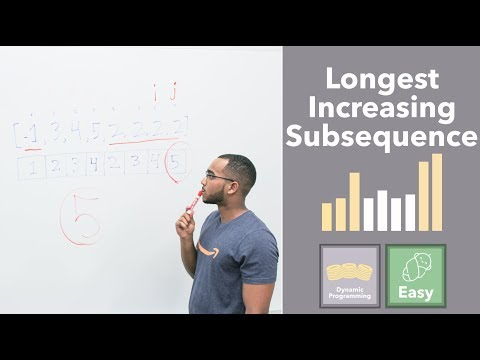

In [4]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('fV-TF4OvZpk')

In [23]:
def lis(sequence):
    lis_memo = [1]*len(sequence) #initialize with 1 because 1 is the default longest subsequence

    for i in range(1,len(sequence)):
        for j in range(0,i):
            #is seqi]>seq[j]
            if sequence[i]>sequence[j]:
                print(sequence[i],sequence[j])
                #can longest subsequence upto i be added to longest subsequence upto j
                lis_memo[i] = max(lis_memo[j]+1, lis_memo[i])
    return max(lis_memo)

In [24]:
lis([-1,3,4,5,2,2,2,2])

3 -1
4 -1
4 3
5 -1
5 3
5 4
2 -1
2 -1
2 -1
2 -1


4

### 2. Longest Common Subsequence

We have two strings and we are trying to find the longest common substring. The characters are not necessarily contiguous.

[A good explanation can be found in this video](https://youtu.be/ASoaQq66foQ)

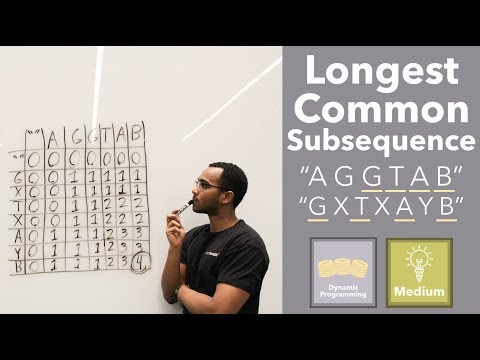

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ASoaQq66foQ')

#### Top-Down Approach

![](../images/lcs.png)

In [4]:
memo = {}
def lcs(s1, s2):
    
    try: #search the memo first
        return memo[(s1,s2)] 
    
    except:
        #base case
        if len(s1)==0 or len(s2)==0: #comparing a string with an empty string, the lcs is 0
            result = 0
            memo[(s1,s2)] = result
            return result

        if s1[-1]==s2[-1]:
            result = 1+lcs(s1[:-1], s2[:-1])
            memo[(s1,s2)] = result
            return result
        else:
            result = max(lcs(s1[:-1], s2), lcs(s1, s2[:-1]))
            memo[(s1,s2)] = result
            return result

In [5]:
lcs("AGGTAB", "GXTXAYB")
# lcs("AAB", "AXB")

4

In [6]:
print(memo)

{('', 'GXTXAY'): 0, ('', 'GXTX'): 0, ('A', 'GXTXA'): 1, ('A', 'GXTXAY'): 1, ('', 'GXT'): 0, ('', 'GX'): 0, ('', 'G'): 0, ('A', ''): 0, ('A', 'G'): 0, ('A', 'GX'): 0, ('A', 'GXT'): 0, ('A', 'GXTX'): 0, ('AG', 'G'): 1, ('AG', 'GX'): 1, ('AG', 'GXT'): 1, ('AG', 'GXTX'): 1, ('AG', 'GXTXA'): 1, ('AG', 'GXTXAY'): 1, ('AG', ''): 0, ('AGG', 'G'): 1, ('AGG', 'GX'): 1, ('AGG', 'GXT'): 1, ('AGG', 'GXTX'): 1, ('AGG', 'GXTXA'): 1, ('AGG', 'GXTXAY'): 1, ('AGGT', 'GXT'): 2, ('AGGT', 'GXTX'): 2, ('AGGT', 'GXTXA'): 2, ('AGGT', 'GXTXAY'): 2, ('AGGTA', 'GXTXA'): 3, ('AGGTA', 'GXTXAY'): 3, ('AGGTAB', 'GXTXAYB'): 4}


m = len(s1), n = len(s2)

Time complexity: O(mn)

Space complexity: O(mn)

### 3. Levenshtein Distance (minimum edit distance)

A bottom up solution is available [here](https://www.youtube.com/watch?v=MiqoA-yF-0M)

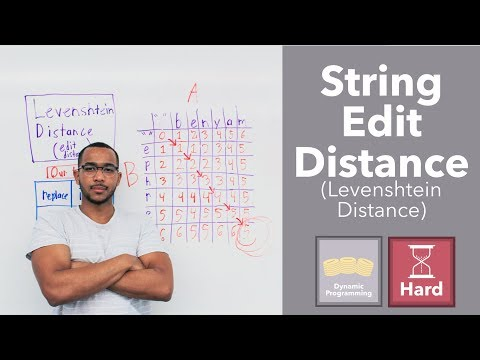

In [3]:
YouTubeVideo('MiqoA-yF-0M')

In [5]:
memo = {}
def levenshtein(s1, s2):
    
    try:
        #check if memo has this entry memoized
        return memo[(s1, s2)]
    except:
        # Base case
        #if either of the strings is empty, the number of operations = length of non emprt string
        if len(s1)==0 or len(s2)==0:
            result = max(len(s1), len(s2))
            memo[(s1,s2)] = result
#             print(s1,s2, result)
            return result
        
        #same character at the end of both strings
        if s1[-1]==s2[-1]:
            result = levenshtein(s1[:-1], s2[:-1])
            memo[(s1,s2)] = result
            return result
        else:
            #adding +1 for accounting for removal of last character from atleast one of the strings
            #min(remove, insert, replace)
            result = 1 + min(levenshtein(s1[:-1], s2), levenshtein(s1, s2[:-1]), levenshtein(s1[:-1], s2[:-1]))
#             print(s1,s2, result)
            memo[(s1,s2)] = result
            return result

In [9]:
levenshtein("aaab", "abaa"), levenshtein("aaa", "aba"), levenshtein("abcd", "efgh")

(2, 1, 4)

In [7]:
memo

{('', 'ab'): 2,
 ('', ''): 0,
 ('a', 'a'): 0,
 ('', 'a'): 1,
 ('a', 'ab'): 1,
 ('aa', 'aba'): 1,
 ('aaa', 'abaa'): 1,
 ('a', ''): 1,
 ('aa', 'a'): 1,
 ('aa', 'ab'): 1,
 ('aaa', 'aba'): 1,
 ('aa', ''): 2,
 ('aaa', 'a'): 2,
 ('aaab', 'ab'): 2,
 ('aaa', 'ab'): 2,
 ('aaab', 'aba'): 2,
 ('aaab', 'abaa'): 2}

### 4. Binomial Coefficients

![](../images/bincoeff.png)

![](../images/bn2.png)

Write a function that takes two values n and k and return C(n, k)

Time complexity: O(nk)

Space complexity: O(nk)

A good solution [can be found here](https://www.youtube.com/watch?v=_iAIto06bWk&list=PLqM7alHXFySGbXhWx7sBJEwY2DnhDjmxm&index=9)

![](../images/bn3.png)

In [5]:
memo = {}

def C(n,k):
    
    try:
        return memo[(n,k)]
    except:
        if k==n or k==0:
            return 1
        else:
            result = C(n-1, k-1)+C(n-1,k)
            memo[(n,k)] = result
            return result


In [8]:
C(5,2)

10

In [9]:
memo

{(2, 1): 2, (3, 1): 3, (4, 1): 4, (5, 1): 5, (3, 2): 3, (4, 2): 6, (5, 2): 10}

### 5. 0-1 Knapsack Problem

![](../images/ks.png)

A good explanation can be found [here](https://www.youtube.com/watch?v=xOlhR_2QCXY&t=313s)

In [3]:
weights = [10, 20, 30]
values = [60, 100, 120]
capacity = 50

In [20]:
memo = {} #{(index, capacity)}

def knapsack(index, capacity):
    
    try:
        return memo[(index, capacity)]
    except:
        if index>=len(values) or capacity==0:
            return 0
        else:
            if weights[index]>capacity:
                value_without_adding = knapsack(index+1, capacity)
                return value_without_adding
            else:
                value_after_adding = values[index] + knapsack(index+1, capacity-weights[index])
                value_without_adding = knapsack(index+1, capacity)
                result = max(value_after_adding, value_without_adding)
                memo[(index, capacity)] = result
                return result

In [21]:
knapsack(0, capacity)

220

In [19]:
memo

{(2, 20): 120, (1, 20): 120, (0, 30): 120}